In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance

seed = np.random.seed(0)

In [2]:
df = pd.read_csv("Income2.csv")

In [3]:
df

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922
5,18.275862,26.206897,71.504485
6,19.931034,150.344828,87.970467
7,21.172414,82.068966,79.811030
8,20.344828,88.275862,90.006327
9,10.000000,113.103448,45.655530


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
 1   Seniority  30 non-null     float64
 2   Income     30 non-null     float64
dtypes: float64(3)
memory usage: 848.0 bytes


In [5]:
df.shape

(30, 3)

In [6]:
df.describe()

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,16.386207,93.862069,62.744733
std,3.810622,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,12.482759,44.827586,36.392043
50%,17.034483,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,21.586207,187.586207,99.917173


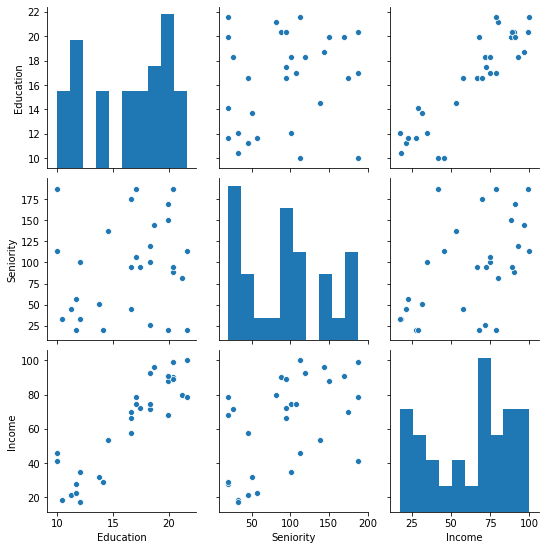

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,Education,Seniority,Income
Education,1.000000,0.194515,0.901003
Seniority,0.194515,1.000000,0.518288
Income,0.901003,0.518288,1.000000


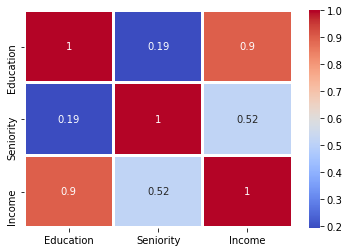

In [9]:
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, linewidths=2)
plt.show()

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [11]:
X.values, y.values

(array([[ 21.5862069 , 113.1034483 ],
        [ 18.27586207, 119.3103448 ],
        [ 12.06896552, 100.6896552 ],
        [ 17.03448276, 187.5862069 ],
        [ 19.93103448,  20.        ],
        [ 18.27586207,  26.20689655],
        [ 19.93103448, 150.3448276 ],
        [ 21.17241379,  82.06896552],
        [ 20.34482759,  88.27586207],
        [ 10.        , 113.1034483 ],
        [ 13.72413793,  51.03448276],
        [ 18.68965517, 144.137931  ],
        [ 11.65517241,  20.        ],
        [ 16.62068966,  94.48275862],
        [ 10.        , 187.5862069 ],
        [ 20.34482759,  94.48275862],
        [ 14.13793103,  20.        ],
        [ 16.62068966,  44.82758621],
        [ 16.62068966, 175.1724138 ],
        [ 20.34482759, 187.5862069 ],
        [ 18.27586207, 100.6896552 ],
        [ 14.55172414, 137.9310345 ],
        [ 17.44827586,  94.48275862],
        [ 10.4137931 ,  32.4137931 ],
        [ 21.5862069 ,  20.        ],
        [ 11.24137931,  44.82758621],
        [ 19

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [13]:
xgbmodel = XGBRegressor(objective='reg:squarederror',seed=seed,n_estimators=200)

In [14]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=12)

[0]	validation_0-rmse:53.7906
Will train until validation_0-rmse hasn't improved in 12 rounds.
[1]	validation_0-rmse:48.6588
[2]	validation_0-rmse:44.1502
[3]	validation_0-rmse:39.9973
[4]	validation_0-rmse:36.2451
[5]	validation_0-rmse:33.0267
[6]	validation_0-rmse:30.0978
[7]	validation_0-rmse:27.3528
[8]	validation_0-rmse:25.0898
[9]	validation_0-rmse:22.9035
[10]	validation_0-rmse:21.0653
[11]	validation_0-rmse:19.4202
[12]	validation_0-rmse:17.9145
[13]	validation_0-rmse:16.5718
[14]	validation_0-rmse:15.2403
[15]	validation_0-rmse:14.1459
[16]	validation_0-rmse:13.1729
[17]	validation_0-rmse:12.2404
[18]	validation_0-rmse:11.3293
[19]	validation_0-rmse:10.6542
[20]	validation_0-rmse:10.0411
[21]	validation_0-rmse:9.53641
[22]	validation_0-rmse:8.97515
[23]	validation_0-rmse:8.48865
[24]	validation_0-rmse:8.07743
[25]	validation_0-rmse:7.7645
[26]	validation_0-rmse:7.46214
[27]	validation_0-rmse:7.29644
[28]	validation_0-rmse:7.04195
[29]	validation_0-rmse:6.97888
[30]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [15]:
y_pred = xgbmodel.predict(X_test)

In [16]:
y_pred

array([38.391132, 27.018848, 65.85546 , 27.844576, 88.66754 , 71.062874],
      dtype=float32)

In [17]:
np.array(y_test)

array([34.67872715, 17.61359304, 66.60179242, 31.91380794, 90.81403512,
       78.80578429])

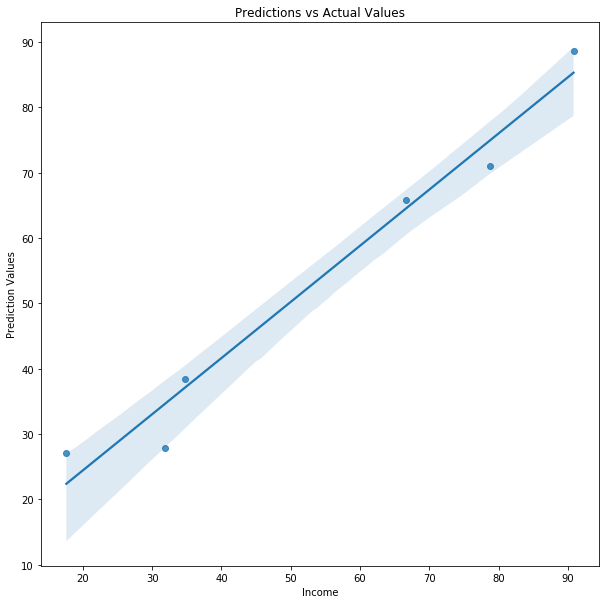

In [18]:
plt.subplots(figsize=(10,10))
plt.title("Predictions vs Actual Values")
plt.ylabel("Prediction Values")
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [19]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is",mse)

Mean Squared Error is 30.652756363014472


In [20]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is",rmse)

Root Mean Squared Error is 5.53649314666012


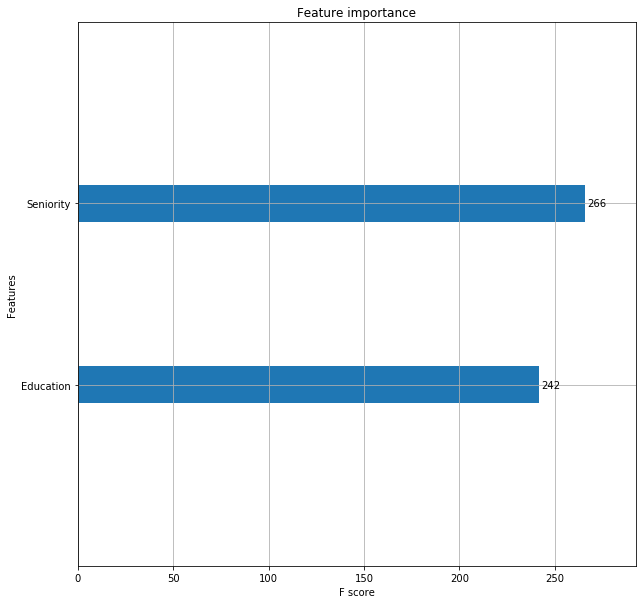

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbmodel, ax=ax)
plt.show()

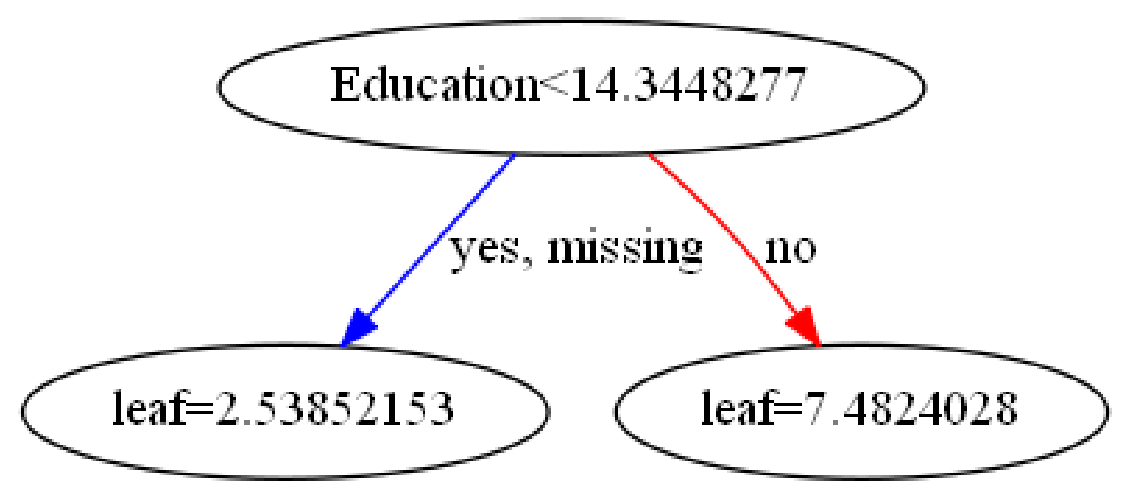

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_tree(xgbmodel, ax=ax)
plt.show()

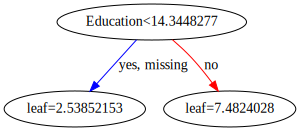

In [23]:
#fig, ax = plt.subplots(figsize=(20,10))
xgb.to_graphviz(xgbmodel)